# Plotting Figure 12
> Comparing analytic, continuous and discrete shape derivative for acoustic duct
- in terms of mesh resolution showing convergence

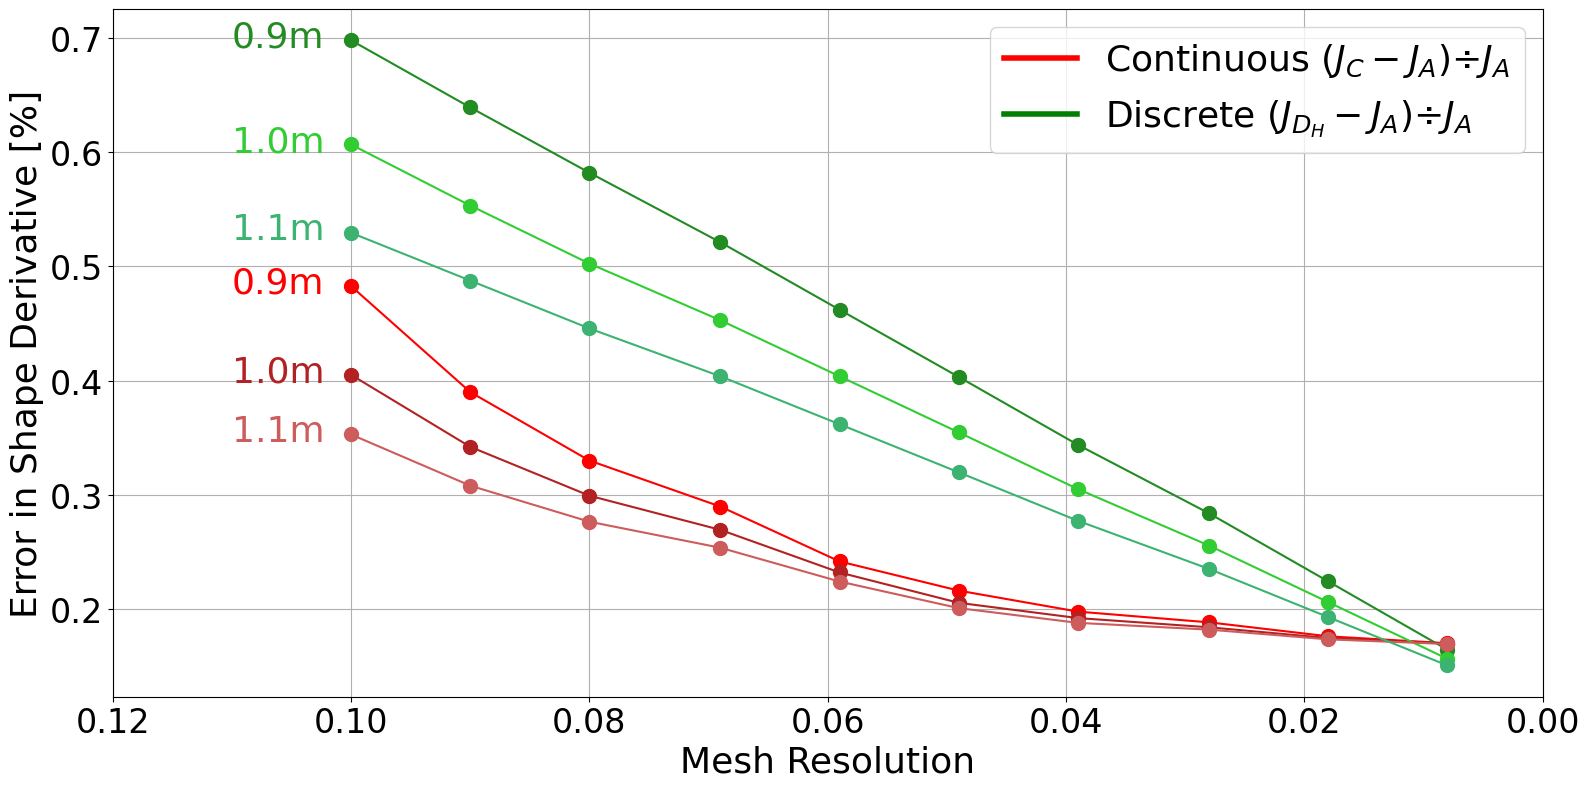

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.lines import Line2D



fontsize=26
os.chdir(os.path.join(os.getcwd()))
file = os.path.join('data_fig12.txt')

# read file
with open(file, 'r') as f:
    lines = f.readlines()

# create empty lists to store the data
mesh = []
duct = []
frequ = []
analytic = []
continuous = []
discrete = []

# read the data from the file
for line in lines[1:]: # skip the first line
    duc, mes, fre, ana, con, dis = map(float, line.strip().split(','))
    mesh.append(mes)
    duct.append(duc)
    frequ.append(fre)
    analytic.append(ana)
    continuous.append(con)
    discrete.append(dis)

# transform the lists into numpy arrays to perform operations
mesh = np.array(mesh[:10])
#mesh = mesh[::-1]
duct = np.array(duct[:10])
frequ = np.array(frequ[:10])

analyt1 = np.array(analytic[:10])
analyt2 = np.array(analytic[10:20])
analyt3 = np.array(analytic[20:30])

cont1 = np.array(continuous[:10])
cont2 = np.array(continuous[10:20])
cont3 = np.array(continuous[20:30])

dis1 = np.array(discrete[:10])
dis2 = np.array(discrete[10:20])
dis3 = np.array(discrete[20:30])


cont_error1 = np.abs((np.array(cont1) - np.array(analyt1)) / np.array(analyt1)) * 100
dis_error1 = np.abs((np.array(dis1) - np.array(analyt1)) / np.array(analyt1)) * 100
cont_error2 = np.abs((np.array(cont2) - np.array(analyt2)) / np.array(analyt2)) * 100
dis_error2 = np.abs((np.array(dis2) - np.array(analyt2)) / np.array(analyt2)) * 100
cont_error3 = np.abs((np.array(cont3) - np.array(analyt3)) / np.array(analyt3)) * 100
dis_error3 = np.abs((np.array(dis3) - np.array(analyt3)) / np.array(analyt3)) * 100


fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(mesh, cont_error1, 'o-', color='red', label='Continuous ($J_C-J_A$)$\div J_A$', markersize=10)
ax.plot(mesh, dis_error1, 'o-', color='forestgreen', label='Discrete ($J_{D_H}-J_A$)$\div J_A$', markersize=10)
ax.plot(mesh, cont_error2, 'o-', color='firebrick', label='Continuous ($J_C-J_A$)$\div J_A$', markersize=10)
ax.plot(mesh, dis_error2, 'o-', color='limegreen', label='Discrete ($J_{D_H}-J_A$)$\div J_A$', markersize=10)
ax.plot(mesh, cont_error3, 'o-', color='indianred', label='Continuous ($J_C-J_A$)$\div J_A$', markersize=10)
ax.plot(mesh, dis_error3, 'o-', color='mediumseagreen', label='Discrete ($J_{D_H}-J_A$)$\div J_A$', markersize=10)

# add text labels
x_last = mesh[0]
ax.text(x_last+0.01, cont_error3[0]-0.012, f'1.1m', fontsize=fontsize, ha='left', va='bottom', color='indianred')
ax.text(x_last+0.01, cont_error2[0]-0.012, f'1.0m', fontsize=fontsize, ha='left', va='bottom', color='firebrick')
ax.text(x_last+0.01, cont_error1[0]-0.012, f'0.9m', fontsize=fontsize, ha='left', va='bottom', color='red')
ax.text(x_last+0.01, dis_error3[0]-0.012, f'1.1m', fontsize=fontsize, ha='left', va='bottom', color='mediumseagreen')
ax.text(x_last+0.01, dis_error2[0]-0.012, f'1.0m', fontsize=fontsize, ha='left', va='bottom', color='limegreen')
ax.text(x_last+0.01, dis_error1[0]-0.012, f'0.9m', fontsize=fontsize, ha='left', va='bottom', color='forestgreen')




# Set labels and title
ax.set_xlabel('Mesh Resolution', fontsize=fontsize)
ax.set_ylabel('Error in Shape Derivative [%]', fontsize=fontsize)
#ax.legend(loc='upper right',fontsize=fontsize)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=24)

custom_lines = [
    Line2D([0], [0], color='red', lw=4, label='Continuous ($J_C-J_A$)$\div J_A$'),
    Line2D([0], [0], color='green', lw=4, label='Discrete ($J_{D_H}-J_A$)$\div J_A$')
]
ax.legend(handles=custom_lines, loc='upper right', fontsize=fontsize)
# Move the legend outside of the plot
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)

#ax.set_yscale('log')
#ax.set_ylim(-2,2)
ax.set_xlim(0.12, 0.0)  # Invert the x axis
# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure to the 'Images/' folder
fig.savefig(os.path.join('Images/', 'Fig12.png'))

